#Procesamiento de imágenes satelitales meteorológicas con Python 2022.
### Sergio Masuelli
##Practico 2.

Objetivos:

  a) Realizar cálculos básicos sobre movimientos de satélites y cantidades asociadas.

  b) Familiarizarse con variables atmosféricas y cantidades típicas de ellas.

https://docs.astropy.org/en/stable/constants/index.html

https://www.tutorialspoint.com/scipy/scipy_constants.htm

### Problema 1:

Obtener g para distintas alturas hasta 100km usando la expresión exacta. Grafique g vs h. ¿Es una buena aproximación usar un valor cte de g hasta 100km?


In [2]:
#***********************
# Solución 1
#***********************
# http://fcaglp.unlp.edu.ar/extension/preguntas/gravedad.html
# G.M / (R+h)2
from astropy.constants import M_earth, R_earth, G

altura = list(range(1000,101000,1000))
grav = []

for h in altura:
    calculo = ((G.value*M_earth.value) / ((R_earth.value+h)**2))
    grav.append(calculo)

* La gravedad va disminuyendo la altura, a los 100 km alcanza un valor de aproximadamente 9.5, por lo que considerarla constante hasta los 100 km no parece una buena aproximacion.

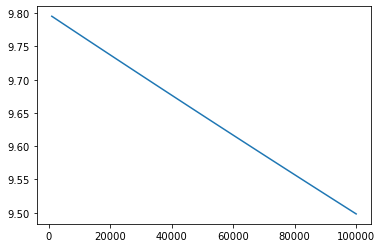

In [3]:
import matplotlib.pyplot as plt # Impot the relevant module

# Plot the first x and y axes:
plt.plot(altura,grav)
plt.show() 

### Problema 2:

Calcule la altura de una órbita perfectamente circular, para un satélite LEO polar que tenga un ciclo de revisita de exactamente un día. Considerar los casos en que se tiene en cuenta o no la revolución de la Tierra alrededor del sol. 24 o 23,56

In [4]:
#***********************
# Solución 2
#***********************
# Comentario: Dado que el período del satélite es de un día terrestre, imagínese que pasaría para un observador que se encuentra en la superficie de la tierra? 
# Como vería la trayectoria del satelite?

%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

# Constantes universales : revisar unidades!!
from astropy import constants as const1
from astropy import units # perimte conversion de unidades
from scipy import constants as const2
from math import pi, sqrt

G = const1.G.value # Gravitational constant

Rt = const1.R_earth.value #Earth equatorial radius

M_earth = 5.97216787e+24

# k = 3.10e-19 # s2/m3

# Inserte el código aquí

print("Altura de orbita minima")
a_min = 500000 # 500 km
print(a_min)
print("Altura de orbita maxima")
a_max = 1000000 # 1000 km
print(a_max)

# Esto define el periodo minimo y maximo por la formula
print("Periodo minimo")
t_min = sqrt((4*pi**2)*(a_min+Rt)**3/(G*M_earth)) # me quedaria en m3/kg
print(t_min)
print("Periodo maximo")
t_max = sqrt((4*pi**2)*(a_max+Rt)**3/(G*M_earth))
print(t_max) #segundos

print("")
dia = 86400 # Definido un dia
orbitas_max = dia/t_min
orbitas_min = dia/t_max

print('Numero de órbitas minimas %f' %orbitas_min) # Todos estos deberian cumplir
print('Numero de órbitas maximas %f' %orbitas_max) # Todos estos deberian cumplir

print('Numero de órbitas posibles: entre %d y %d' %(int(orbitas_min+1), int(orbitas_max)))

t=86400/14
r = (((t**2)*(M_earth*G))/(4*pi**2))**(1/3) - Rt
# T=1 dia / numero de orbitas
print("Altura de una órbita perfectamente circular, para un satélite LEO polar que tenga un ciclo de revisita de exactamente un día y N=14")
print("%f km" %(r/1000))# km
# Ahi quedo en LEO

Altura de orbita minima
500000
Altura de orbita maxima
1000000
Periodo minimo
5676.932517405285
Periodo maximo
6307.072292727675

Numero de órbitas minimas 13.698908
Numero de órbitas maximas 15.219487
Numero de órbitas posibles: entre 14 y 15
Altura de una órbita perfectamente circular, para un satélite LEO polar que tenga un ciclo de revisita de exactamente un día y N=14
893.831887 km


* Órbita terrestre baja (LEO): Entre 500 y 1000 km de altura.
T2=4π2/μ*a3
donde μ es igual a la masa del cuerpo central por la constante universal que tiene unidades de m3/kg*s2

### Problema 3:

Suponga que se desea con un sensor satelital en órbita LEO heliosincrónica, que tenga 180km de *swath* (ancho de barido del sensor), con 4km de solapamiento con las órbitas contiguas, y una revisita de 16 días:
    
    a) Calcule el número de tracks para que cubra toda la Tierra en el ecuador.
    b) Calcule el número de pasadas por día.
    c) Si los tracks se numeran en forma consecutiva hallar la secuencia en que se van cubriendo los mismos.

In [5]:
#--------------------------
# Solución 3.a
#--------------------------
# Ayuda: este número (entero) por el swath efectivo debe ser igual al perímetro de la Tierra.
# Número Total de Tracks
# Por pasada ve nuevo 180-8 = 172km swath efectivo
perim_tierra = (2*pi*Rt)
N_tracks = perim_tierra/172000
print("a) N_tracks=")
print(round(N_tracks,0))
N_tracks=int(round(N_tracks,0))
print("")
#--------------------------
# Solución 3.b
#--------------------------
# Ayuda: Con el número de pasadas totales y la revisita en días se puede obtener las pasadas por día.
n_dia = N_tracks/16
print("b) Numero de vueltas por dia=")
print(n_dia)# 14.5

# # --------------------------
# # Solución 3.c
# # --------------------------
# # Un seudo-código orientativo

#Completar: distancia angular entre tracks contiguos
d_track = 172000/(2*pi*Rt)
# print(d_track)
#Completar: distancia angular entre órbitas contiguas
d_orb = (86400/n_dia)/86400
# print(d_orb)
#Completar:  
d_pass = d_orb/d_track
# d_pass es el numero de pasadas que hay entre dos órbitas consecutivas
print(d_pass) # Quedo perfecto 16
#Completar
track = np.ones(N_tracks,dtype="int") #array para los tracks ordenados

# Completar: cada iteración representa una revolución orbital. Para cada revolución, le sumamos d_pass
for i in range(N_tracks-1):
    track[i+1] = track[i]+15
    # Eventualmente el track[i+1] supera a N_tracks, por lo que hay que corregirlo.
    if track[i+1] > N_tracks:
      track[i+1] -= N_tracks
    
print("")
print('c) La secuencia en la que se cubren los tracks, es: ')
print(track)


a) N_tracks=
233.0

b) Numero de vueltas por dia=
14.5625
15.999514605338705

c) La secuencia en la que se cubren los tracks, es: 
[  1  16  31  46  61  76  91 106 121 136 151 166 181 196 211 226   8  23
  38  53  68  83  98 113 128 143 158 173 188 203 218 233  15  30  45  60
  75  90 105 120 135 150 165 180 195 210 225   7  22  37  52  67  82  97
 112 127 142 157 172 187 202 217 232  14  29  44  59  74  89 104 119 134
 149 164 179 194 209 224   6  21  36  51  66  81  96 111 126 141 156 171
 186 201 216 231  13  28  43  58  73  88 103 118 133 148 163 178 193 208
 223   5  20  35  50  65  80  95 110 125 140 155 170 185 200 215 230  12
  27  42  57  72  87 102 117 132 147 162 177 192 207 222   4  19  34  49
  64  79  94 109 124 139 154 169 184 199 214 229  11  26  41  56  71  86
 101 116 131 146 161 176 191 206 221   3  18  33  48  63  78  93 108 123
 138 153 168 183 198 213 228  10  25  40  55  70  85 100 115 130 145 160
 175 190 205 220   2  17  32  47  62  77  92 107 122 137 152 167 1

### Problema 4: 

Obtener la masa total de la atmosfera suponiendo que la Tierra es una
esfera de $6370km$, que la atmósfera es isotrópica con una presión de $1atm$ en su superficie. Considerar $g = 9, 8ms^{−2}$ en promedio.


In [6]:
#***********************
# Solución 4
#***********************
print("Superficie terrestre en metros cuadrados")
sup = (4*pi*(Rt**2))
print(sup) # Superficie terrestre en m2

print("Fuerza gravitatoria de la tierra sobre la atmosfera en Newtons")
f_grav = sup*101325
print(f_grav) # Fuerza ejerce tierra sobre atmosfera en Newtons

print("Masa de la atmosfera en Kg")
masa = f_grav/9.81
print(masa) # Fuerza ejerce tierra sobre atmosfera en Newtons


Superficie terrestre en metros cuadrados
511201962310544.9
Fuerza gravitatoria de la tierra sobre la atmosfera en Newtons
5.179753883111596e+19
Masa de la atmosfera en Kg
5.280075314079099e+18


* patm, es el peso de la columna de aire por unidad de superficie. 
* multiplicando patm por la superficie terrestre, se obtiene la fuerza con que la Tierra atrae a la masa de toda la atmósfera.
* 1atm = 101325 N/m2 = kg/m s2
* Si el valor de la aceleración debida a la gravedad terrestre, g, es constante en toda la extensión de la atmósfera, se obtiene su masa sin más que dividir la expresión por g.

### Problema 5:

Calcule la presión para una dada altura z.

  a) Haga una función en Python que calcule $P(z)$ mediante la escala de alturas.

  b) Modele un perfil lineal a trozos de $T$ vs $z$ hasta los $100km$ y calcule explicitamente $P(z)$, a través de sendas funciones en Python.

  c) Haga un gráfico de $P$ vs $z$ para los primeros $100km$, superponiendo ambos cálculos de $P$, con el eje $y$ en escala logarı́tmica y otro con ambos ejes en escala logarı́tmica. ¿Qué puede concluir?


* Pa = ρ.g.h

<IPython.core.display.Javascript object>


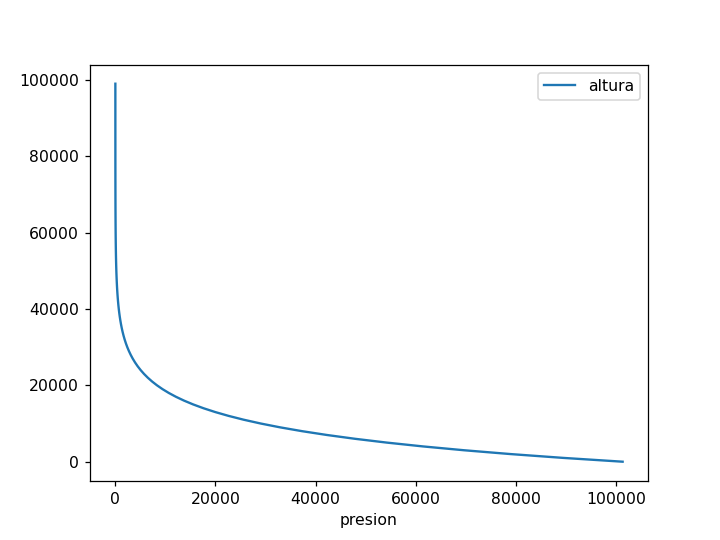

<AxesSubplot:xlabel='presion'>

In [7]:
import pandas as pd
from math import exp 
#***********************
# Solución 5.a
#***********************

def P1(z, H): #Con escalar de alturas
    ''' H escala de altura, escalar'''
    P=101325*exp(-z/H)
    return P
# P1(1,8)

# Caculo P(z) en altura:
alturas = range(0,100000,1000)
grav = 9.81 # aceleracion de la gravedad m/s2
dens = 1.225 # densidad del aire kg/m3

def P1(z, grav, dens, H): #Con escalar de alturas
    a=[]
    for i in z: 
        p=101325*exp(-i/H)
        a.append(p)
    return a

#((100000-i)*grav*dens)/101325
Pres1=P1(alturas,grav,dens,8000)
# print(len(a))

import matplotlib.pyplot as plt # Impot the relevant module
# Plot the first x and y axes:
df_p = pd.DataFrame( {
    'presion': Pres1,
    'altura': alturas
    })
df_p.plot('presion', 'altura')
# df_p.plot('presion_atm', 'altura')


* p = altura x densidad x gravedad
* Altura de la atmósfera: 10000 metros.
* Densidad del aire: 1,225 kg/m³,
* Fuerza de la gravedad: 9,81 m/s2.
* La presion calculada esta en pascales, 1 atm 101325 pascal

<IPython.core.display.Javascript object>


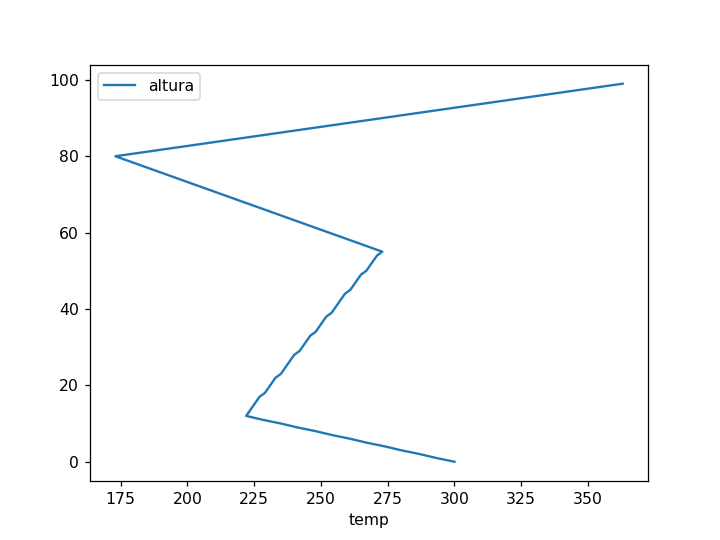

<AxesSubplot:xlabel='temp'>

In [8]:
# #***********************
# # Solución 5.b
# #***********************

# def T_lineal(z, TT): # Lineal a trozos
# ''' z y TT arrays'''
#   return T

import pandas as pd

alturas = range(0,100,1)
grav = 9.81 # aceleracion de la gravedad
dens = 1.225 # densidad del aire


t_tro = np.arange(100)

t_tro[:12] = 300 - 6.5 * np.arange(12)
tini= 300 - 6.5 * 12
tfin = 273
z = np.arange(12,55) - 12
t_tro[12:55] = tini + (tfin - tini) * z / len(z) 
tini= 273
tfin = 173
z = np.arange(55,80) - 55
t_tro[55:80] = tini + (tfin - tini) * z / len(z) 
tini= 173
tfin = 373
z = np.arange(80, 100) - 80
t_tro[80:100] = tini + (tfin - tini) * z / len(z)


len(t_tro)
import matplotlib.pyplot as plt # Impot the relevant module
# Plot the first x and y axes:
df_t = pd.DataFrame( {
    'temp': t_tro,
    'altura': alturas
    })
df_t.plot('temp', 'altura')


* Troposfera (hasta los 12.000 m de altitud), el gradiente térmico estándar es de -6,5 °C por kilómetro.

In [9]:
# #***********************
# # Solución 5.c
# #***********************
# Calculo p a partir de la T

# Caculo P(z) en altura:
alturas = range(0,100000,1000)
grav = 9.81 # aceleracion de la gravedad m/s2
dens = 1.225 # densidad del aire kg/m3

def P2(grav,T): #Con escalar de alturas #integración berreta
    integ = 1000 * grav * 0.028 / (const1.R.value * T)
    integ[1:] = integ[:-1]
    integ[0] = 0
    integrando = integ.cumsum()
    Pres2 = 101300 * np.exp(-integrando)
    return Pres2
  
Pres2 = P2(grav, t_tro)

C:\Users\marti\AppData\Local\Temp\ipykernel_10276\3673319377.py:7: RuntimeWarning: divide by zero encountered in log10
  "log_a":np.log10(alturas),


<IPython.core.display.Javascript object>


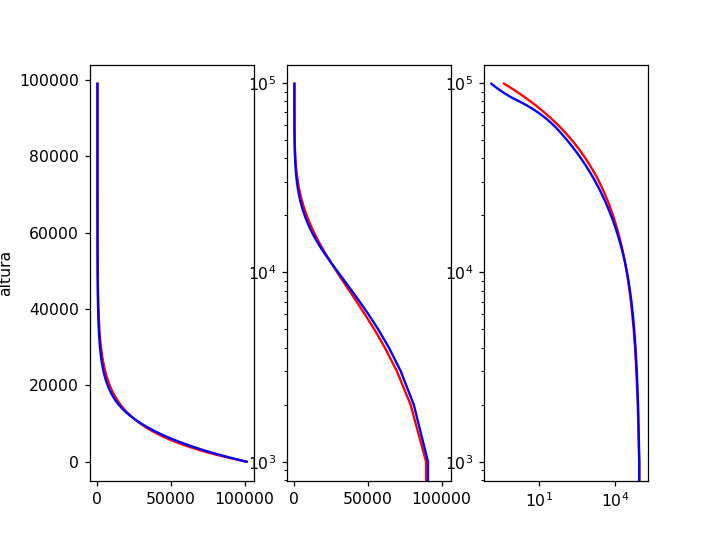

In [10]:
from math import log

df = pd.DataFrame( {
#     'temp': t_tro,
    "pres" : Pres2,
    'altura': alturas,
    "log_a":np.log10(alturas),
    "log_p":np.log10(Pres2),
#     "log_t":np.log10(t_tro)
    })

# plt.semilogy()
df.columns


plt.figure()
plt.subplot(131)
plt.plot(Pres1, alturas, 'r')
plt.plot(Pres2, alturas, 'b')
plt.ylabel('altura')

plt.subplot(132)
plt.semilogy(Pres1, alturas, 'r')
plt.semilogy(Pres2, alturas, 'b')

plt.subplot(133)
plt.loglog(Pres1, alturas, 'r')
plt.loglog(Pres2, alturas, 'b')

### Problema 6: 

Obtener mediante una función de Python el porcentaje de la masa de aire
para una capa comprendida entre 2 alturas.

  a) Para la troposfera usando escala de altura.

  b) Para la estratosfera usando escala de altura.

  c) Usando el perfil de $T(z)$ repita ambos cálculos y calcule su diferencia porcentual.


* Volumen = 4/3 pi r3
* densidad atmosfera = 1.293 Kg/m3

In [11]:
#--------------------------
# Solución 6.a
#--------------------------
# Volumen total de la atmosfera
print("Volumen total de la atmosfera de 0 a 100 km")
vol_enc_tot = ((4/3)*pi*(100000**3))
print("Volumen encerrado")
print(vol_enc_tot)
print("Masa encerrada")
masa_tot = 1.293*vol_enc_tot
print(masa_tot) #kg

print(" ")
# Calculamos en la troposfera desde los 12 hasta los 10 km
print("Calculamos en la troposfera desde los 12 hasta los 10 km")
vol_enc_tro = ((4/3)*pi*(12000**3))-((4/3)*pi*(10000**3))
print("Volumen encerrado")
print(vol_enc_tro)
print("Masa encerrada")
masa_tro = 1.293*vol_enc_tro
print(masa_tro) #kg
print("Porcentaje de masa encerrada")
print((masa_tro/masa_tot)*100)

print(" ")
#--------------------------
# Solución 6.b
#--------------------------
# Calculamos en la estratosfera desde los 25 hasta los 30 km
print("Calculamos en la estratosfera desde los 20 hasta los 25 km")
vol_enc_est = ((4/3)*pi*(25000**3))-((4/3)*pi*(20000**3))
print("Volumen encerrado")
print(vol_enc_est)
masa_est = 1.293*vol_enc_est
print("Masa encerrada")
print(masa_est) #kg
print("Porcentaje de masa encerrada")
print((masa_est/masa_tot)*100)

Volumen total de la atmosfera de 0 a 100 km
Volumen encerrado
4188790204786390.5
Masa encerrada
5416105734788803.0
 
Calculamos en la troposfera desde los 12 hasta los 10 km
Volumen encerrado
3049439269084.492
Masa encerrada
3942924974926.248
Porcentaje de masa encerrada
0.07279999999999999
 
Calculamos en la estratosfera desde los 20 hasta los 25 km
Volumen encerrado
31939525311496.227
Masa encerrada
41297806227764.62
Porcentaje de masa encerrada
0.7624999999999998


In [12]:
#--------------------------
# Solución 6.c
#--------------------------
# for i in range(10,13):
#     print(i)
import statistics
t_tro=statistics.mean(df_t.iloc[[10,11,12]]["temp"])
t_est=statistics.mean(df_t.iloc[[25,26,27,28,29,30]]["temp"])

dens_tro= (1* 28)/(0.082*(273.15+t_tro))
dens_est= (1* 28)/(0.082*(273.15+t_est))

masa_tro= dens_tro*vol_enc_tro
masa_est= dens_est*vol_enc_est

print("Diferencia porcentual de masa encerrada")
print(((masa_est-masa_tro)/masa_tot)*100)

Diferencia porcentual de masa encerrada
0.35420127713165894


d = (1 atm * 28g/mol) / (0,082 (atm * L/K·mol) *273 K) = 1,25 g/L

### Problema 7:

Hacer una función en Python que calcule la concentración de moléculas de
aire en función de T y P .

  a) A nivel de piso: $P = 1atm$, $T = 20^oC$.

  b) A $10km$ de altura.

  c) Calcular la cantidad de moléculas por unidad de área entre dos capas: $20km < z < 25km$.

  d) Calcule la cantidad de moléculas Oxı́geno por unidad de área entre dos capas: $20km < z < 25km$.


* Peso molecular aire 28.84 g/mol
* P V = n R T
* concentracion n/V = P / RT
* cantidad moleculas n = PV / RT
* 0,082 atm.L.K-1.mol-1
* 8,205746 x 10-5	m3 atm / (K mol)
* Kelvin a centirgados +273.15

In [18]:
#***********************
# Solución 7
#***********************
def conc_molec(T, P): #Con escalar de alturas
    ''' T en centigrados, P en atmosferas'''
    conc = P/((8.205746e-5)*(273.15+T)) #mol/m3
    return conc


# a)
print("A)")
print("Concentracion a)")
conc_a = conc_molec(20,1)
print(conc_a) # mol/litro
print("")

# b)
print("B)")
print("Presion a 10km")
print(df_p.iloc[10]["presion"]/101325)
print("T a 10km")
print(df_t.iloc[10]["temp"])

print("Concentracion b)")
conc_b = conc_molec(df_t.iloc[10]["temp"],df_p.iloc[10]["presion"]/101325)
print(conc_b) # mol/m3

# C)
print("")
print("C)")
print("Promedio P")
p_prom = statistics.mean(df_p.iloc[[20,21,22,23,24,25]]["presion"])
print(p_prom/101325)
p_atm = p_prom/101325
print("Promedio T")
t_prom = statistics.mean(df_t.iloc[[20,21,22,23,24,25]]["temp"])
print(t_prom)
concent_molec = conc_molec(t_prom,p_prom/101325)
print("Cantidad de moles por unidad de area entre 20 y 25 km")
cant_area=concent_molec*5000 # Por la altura de la capa
print(cant_area)
print("Cantidad de moleculas por unidad de area entre 20 y 25 km")
cant_moleculas=cant_area*6.022e23
print(cant_moleculas)
print("")

# D)
print("D)")
# En un 1 mol hay 6.022e23 moleculas y hay 1 de 02 cada 1 de agua, por lo tanto:
print("Cantidad de moleculas por unidad de area entre 20 y 25 km de O2")
cant_moleculas_o2=cant_area*6.022e23
print(cant_moleculas_o2)
print("")
print("Cantidad de moleculas por unidad de area entre 20 y 25 km de H2")
cant_moleculas_h2=cant_area*6.022e23*2
print(cant_moleculas_h2)

A)
Concentracion a)
41.57114933143246

B)
Presion a 10km
0.2865047968601901
T a 10km
235
Concentracion b)
6.871030842324206

C)
Promedio P
0.06143212639331775
Promedio T
234
Cantidad de moles por unidad de area entre 20 y 25 km
7380.929428452252
Cantidad de moleculas por unidad de area entre 20 y 25 km
4.4447957018139465e+27

D)
Cantidad de moleculas por unidad de area entre 20 y 25 km de O2
4.4447957018139465e+27

Cantidad de moleculas por unidad de area entre 20 y 25 km de H2
8.889591403627893e+27


### Problema 8:

¿Dónde hay más cantidad de vapor de agua, en el desierto tropical o en la
Antártida?

  a) Hacer una función en Python que calcule la presión de saturación para el vapor de agua en función de $T$.

  b) Hacer una función en Python que calcule la densidad de vapor de agua en función de la humedad relativa y la $T$.

  c) Calcule la densidad de vapor de agua para humedad relativa = $100\%$ y $T = 0^oC$ (Antártida) y para humedad relativa = $10\%$ y $T = 40^oC$ (desierto tropical).


* Tengo que poner el calor latente y la masa molar del agua, quien va en calor latente del agua.

* En el caso del agua, para que el agua cambie de sólido (hielo) a líquido, a 0ºC se necesitan 334 J/kg. Para que cambie de líquido a vapor a 100 ºC se precisan 2.260 J/kg.
* Masa molar agua = 0.0180153 kg/mol
* R 286,9	J / (kg K)

* Razón de mezcla = Masa de vapor de agua / Masa de aire seco 
* [q] = gr vapor / kg de aire seco
* En esta sala, probablemente q = 5 gr/Kg

* Humedad absoluta = densidad del vapor (Masa/Volumen)
* Como r(aire) ~ 1 kg/m3, si q=5 gr/Kg entonces r(vapor) ~ 5 g/m3

In [21]:
#***********************
# Solución 8.a
#***********************
def e_sv(T):
    evs=6.11*(exp(-2.26*0.0180153/(286.9*(T+273.15)))/exp(-2.26*0.0180153/(286.9*(273.15))))
    return evs


#***********************
# Solución 8.b
#***********************

def rho_v(hum, T):
    '''hum: humedad relativa en %'''
    ev = (hum * e_sv(T))/100 
    return ev

#***********************
# Solución 8.c
#***********************
print("Densidad de vapor de agua Antártida")
print(rho_v(100,0))
print("")
print("Densidad de vapor de agua desierto tropical")
print(rho_v(10,40))
print("")

Densidad de vapor de agua Antártida
6.11

Densidad de vapor de agua desierto tropical
0.6110000405477709



### Problema 9:

 ¿Cuántas gotitas de nube por $m^3$ habrá aproximadamente si tenemos una
relación de mezcla de $1g$ de agua de nube en $1kg$ de aire a $3km$ de altura?


In [23]:
temp_3 = df_t.iloc[3,0]
pres_3 = df_p.iloc[3,0]

* D = P * M/ R* T
* masa molar promedio del aire seco es 28,97 g/mol.
* 0,082 atm.L.K-1.mol-1
* 8,205746 x 10-5	m3 atm / (K mol)
* Diametro medio gota 0,02 mm

In [27]:
#***********************
# Solución 9
#***********************

#Calcular densidad del aire para T y P a 3km
dens = (((pres_3/101325) * 29.97) / ((8.205746e-5) * (temp_3+273)))
print("Densidad")
print(dens)
# P en atm, T en K, masa molec en g/mol. El resultado queda en g/m3 

#Calcular la masa de agua líquida en 1 m^3
masa_1 = dens * 1
print("Masa")
print(masa_1) #g

#Suponer un tamaño medio para las gotitas de nube para calcular su volumen
vol_gota = ((4/3)*pi)*((0.00002)**3)
print("Volumen gota")
print(vol_gota)



Densidad
0.14627133175066367
Masa
0.14627133175066367
Volumen gota
3.351032163829113e-14
